# Import Libraries


In [33]:
import pandas as pd
import numpy as np
import shutil
import matplotlib.pyplot as plt
import os
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
sourcePath = "../../data/interim/archive/images/"
print("Below listed the Classes of cats:  \n")

folders = []
totalImages = 0
for folder in os.listdir(sourcePath):
    print(f"{folder} has over {len(os.listdir(sourcePath + folder))} images")
    totalImages += len(os.listdir(sourcePath + folder))
    folders.append(folder)


print(f"There are currently: {len(folders)} class available in the dataset.\n")
print(f"Total Image from the datasets: {totalImages} images" )

Below listed the Classes of cats:  

apple_pie has over 1000 images
baby_back_ribs has over 1000 images
baklava has over 1000 images
beef_carpaccio has over 1000 images
beef_tartare has over 1000 images
beet_salad has over 1000 images
beignets has over 1000 images
bibimbap has over 1000 images
bread_pudding has over 1000 images
breakfast_burrito has over 1000 images
bruschetta has over 1000 images
caesar_salad has over 1000 images
cannoli has over 1000 images
caprese_salad has over 1000 images
carrot_cake has over 1000 images
ceviche has over 1000 images
cheesecake has over 1000 images
cheese_plate has over 1000 images
chicken_curry has over 1000 images
chicken_quesadilla has over 1000 images
chicken_wings has over 1000 images
chocolate_cake has over 1000 images
chocolate_mousse has over 1000 images
churros has over 1000 images
clam_chowder has over 1000 images
club_sandwich has over 1000 images
crab_cakes has over 1000 images
creme_brulee has over 1000 images
croque_madame has over 10

In [6]:
data_dir = "../../data/interim/archive/images/"

# Data Collection

In [10]:
def train_val_generators(DATA_DIR):
    datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
    train_generator = datagen.flow_from_directory(directory=DATA_DIR,
                                                  batch_size=15,
                                                  class_mode='categorical',
                                                  target_size=(300,300),
                                                  subset = 'training'
                                                 )
    
    validation_generator = datagen.flow_from_directory(directory=DATA_DIR,subset='validation',
                                                                  batch_size=15,
                                                                 class_mode='categorical',
                                                                 target_size=(300, 300))
    
    return train_generator, validation_generator

In [11]:
train_generator, validation_generator = train_val_generators(data_dir)

Found 80800 images belonging to 101 classes.
Found 20200 images belonging to 101 classes.


# Collect the datasets class distribution labels into csv

In [18]:
labels_list = [label for label, index in train_generator.class_indices.items()]
labels_index = [index for label, index in train_generator.class_indices.items()]


In [20]:
labels_list[:5], labels_index[:5]

(['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare'],
 [0, 1, 2, 3, 4])

In [21]:
df = pd.DataFrame({'Food Name': labels_list, 'Numerical Labels': labels_index})

In [23]:
df.head()

,Food Name,Numerical Labels
0,apple_pie,0
1,baby_back_ribs,1
2,baklava,2
3,beef_carpaccio,3
4,beef_tartare,4


In [27]:
csv_dir = "../../data/processed/foods_labels.csv"

In [28]:
df.to_csv(csv_dir)

# Visualize images from dataset

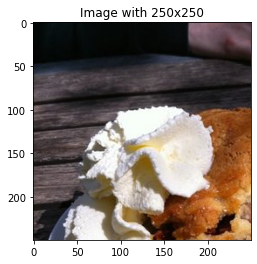

In [48]:
class_name = 'apple_pie'

t = random.sample(os.listdir(f'{data_dir}{class_name}/'), 3)[0]
ta=plt.imread(f'{data_dir}{class_name}/103801.jpg')
plt.title("Image with 250x250")
plt.imshow(ta[:250, :250])



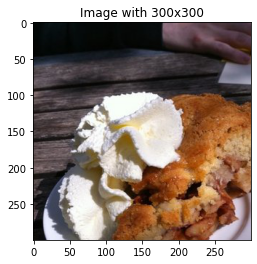

In [49]:
class_name = 'apple_pie'

t = random.sample(os.listdir(f'{data_dir}{class_name}/'), 3)[0]
ta=plt.imread(f'{data_dir}{class_name}/103801.jpg')
plt.title("Image with 300x300")
plt.imshow(ta[:300, :300])

